In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fdir = '/data2/GBT/S140/'

In [35]:
fnamesA = glob.glob(fdir+'Daisy/*/*_0[23]_*A*.npz')
fnamesB = glob.glob(fdir+'Daisy/*/*_0[23]_*B*.npz')
fnamesC = glob.glob(fdir+'Daisy/*/*_0[23]_*C*.npz')
fnamesD = glob.glob(fdir+'Daisy/*/*_0[23]_*D*.npz')

In [37]:
fnamesA.sort()
fnamesB.sort()
fnamesC.sort()
fnamesD.sort()

In [38]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p/hits, hits, ra_bins, dec_bins

In [39]:
def get_calibratedxx(fname):
    nz = np.load(fname)
    gain = nz['tcalx'] / (nz['xxon'] - nz['xxoff'])
    calibratedxx = (nz['xxoff'] * gain)[:, 100:400].mean(1)
    return calibratedxx, nz['sra'], nz['sdec'], gain[:, 100:400].mean(1)

In [40]:
calibratedA = [] 
ras = []
decs = []
gains = []
for fname in fnamesA[16:]:
    calib, ra, dec, gain = get_calibratedxx(fname)
    calib = calib - np.nanmean(calib)
    mask = np.abs(calib) > 0.5
    calib[mask] = 0.
    calibratedA = np.concatenate([calibratedA, calib])
    ras = np.concatenate([ras, ra])
    decs = np.concatenate([decs, dec])
    gains = np.concatenate([gains, gain])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


In [67]:
calibratedB = [] 
ras = []
decs = []
gains = []
for fname in fnamesB[16:]:
    calib, ra, dec, gain = get_calibratedxx(fname)
    #calib = calib - np.nanmean(calib)
    mask = np.abs(calib) > 0.5
    #calib[mask] = 0.
    calibratedB = np.concatenate([calibratedB, calib])
    ras = np.concatenate([ras, ra])
    decs = np.concatenate([decs, dec])
    gains = np.concatenate([gains, gain])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


(110000, 115000)

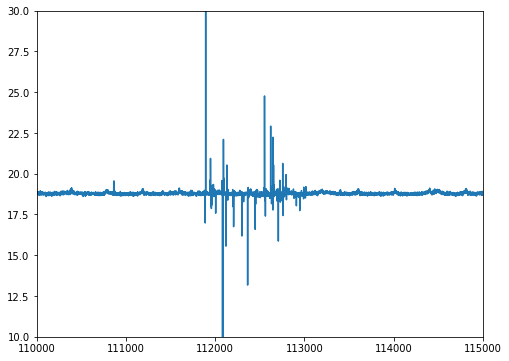

In [71]:
plot(calibratedB)
ylim(10 ,30)
xlim(110000, 115000)

In [60]:
calibratedC = [] 
ras = []
decs = []
gains = []
for fname in fnamesC[16:]:
    calib, ra, dec, gain = get_calibratedxx(fname)
    calib = calib - np.nanmean(calib)
    mask = np.abs(calib) > 0.5
    calib[mask] = 0.
    calibratedC = np.concatenate([calibratedC, calib])
    ras = np.concatenate([ras, ra])
    decs = np.concatenate([decs, dec])
    gains = np.concatenate([gains, gain])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


In [48]:
calibratedD = [] 
ras = []
decs = []
gains = []
for fname in fnamesD[16:]:
    calib, ra, dec, gain = get_calibratedxx(fname)
    calib = calib - np.nanmean(calib)
    mask = np.abs(calib) > 2.
    calib[mask] = 0.
    calibratedD = np.concatenate([calibratedD, calib])
    ras = np.concatenate([ras, ra])
    decs = np.concatenate([decs, dec])
    gains = np.concatenate([gains, gain])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


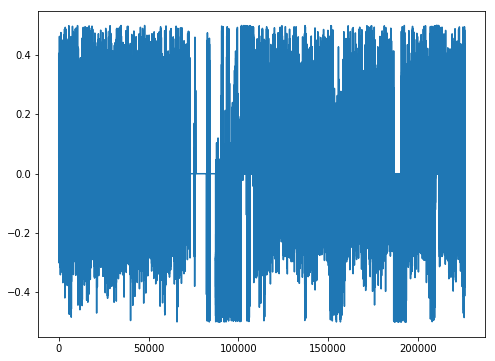

In [64]:
plot(calibratedA)

In [21]:
print ras.min(), ras.max()
print decs.min(), decs.max()

331.484837446 338.164677652
61.8167512531 64.8112255782


In [22]:
Ddec = decs.max() - decs.min()
Dra  = ras.max()- ras.min()

In [23]:
beam = 2. / 60.

In [24]:
print Ddec / beam

89.8342297522


In [25]:
print Dra / beam

200.395206173


In [50]:
datamapA, hits, rabins, decbins = naive_map(calibratedA, ras, decs, 200, 90)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


In [51]:
datamapB, hits, rabins, decbins = naive_map(calibratedB, ras, decs, 200, 90)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


In [61]:
datamapC, hits, rabins, decbins = naive_map(calibratedC, ras, decs, 200, 90)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


In [53]:
datamapD, hits, rabins, decbins = naive_map(calibratedD, ras, decs, 200, 90)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


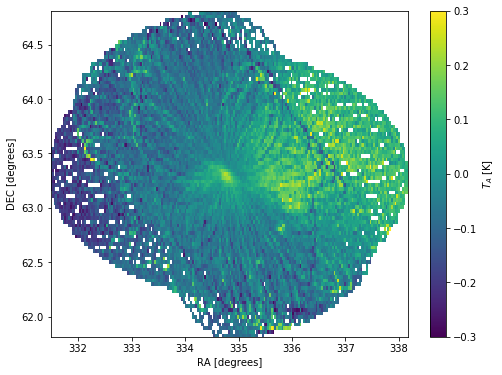

In [55]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, datamapA.T)
clim(-0.3, 0.3)
cb = colorbar()
#pc.cmap.set_under('w')
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('$T_A$ [K]')
#savefig('prelimS140map')

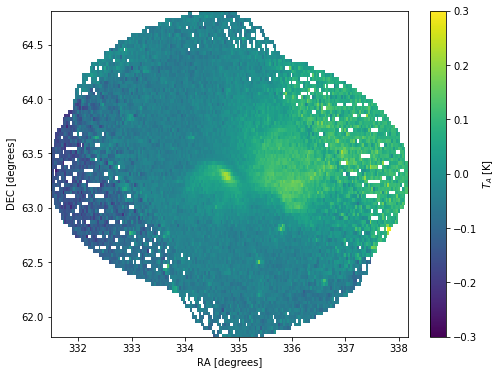

In [56]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, datamapB.T)
clim(-0.3, 0.3)
cb = colorbar()
#pc.cmap.set_under('w')
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('$T_A$ [K]')
#savefig('prelimS140map')

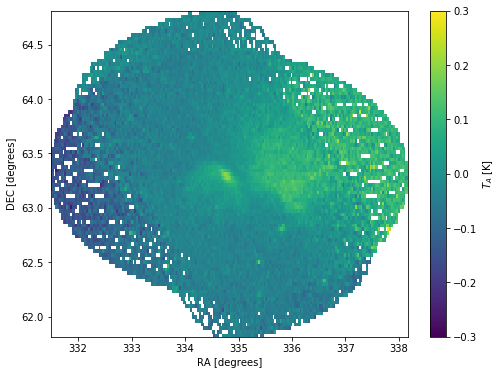

In [62]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, datamapC.T)
clim(-0.3, 0.3)
cb = colorbar()
#pc.cmap.set_under('w')
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('$T_A$ [K]')
#savefig('prelimS140map')

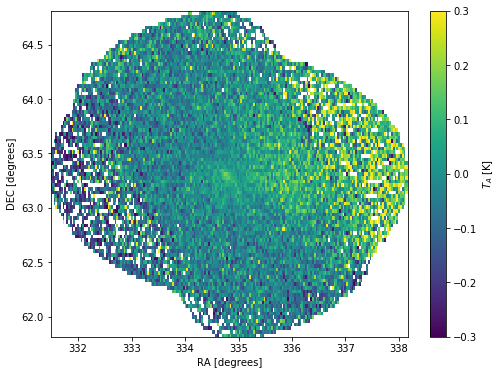

In [58]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, datamapD.T)
clim(-0.3, 0.3)
cb = colorbar()
#pc.cmap.set_under('w')
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('$T_A$ [K]')
#savefig('prelimS140map')

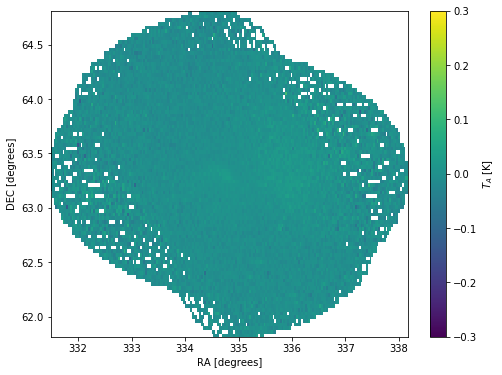

In [63]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, datamapB.T - datamapC.T)
clim(-0.3, 0.3)
cb = colorbar()
#pc.cmap.set_under('w')
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('$T_A$ [K]')
#savefig('prelimS140map')